## Expoloary Data Analysis

In [2]:
## importing basic liabry

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
df=pd.read_csv("credit_data.csv")
df.head()

,clientid,income,age,loan,default
0,1,66155.92510,59.017015,8106.532131,0
1,2,34415.15397,48.117153,6564.745018,0
2,3,57317.17006,63.108049,8020.953296,0
3,4,42709.53420,45.751972,6103.642260,0
4,5,66952.68885,18.584336,8770.099235,1


### 2. Basic Information

In [8]:
### 2.1 top 5 info

In [9]:
df.head()

,clientid,income,age,loan,default
0,1,66155.92510,59.017015,8106.532131,0
1,2,34415.15397,48.117153,6564.745018,0
2,3,57317.17006,63.108049,8020.953296,0
3,4,42709.53420,45.751972,6103.642260,0
4,5,66952.68885,18.584336,8770.099235,1


In [10]:
### 2.1 bottom 5 record

In [11]:
df.tail()

,clientid,income,age,loan,default
1995,1996,59221.04487,48.518179,1926.729397,0
1996,1997,69516.12757,23.162104,3503.176156,0
1997,1998,44311.44926,28.017167,5522.786693,1
1998,1999,43756.05660,63.971796,1622.722598,0
1999,2000,69436.57955,56.152617,7378.833599,0


In [12]:
### 2.3 shape of dataset

In [14]:
df.shape

(2000, 5)

In [18]:
#### there are 2000 row and 5 columns

In [15]:
### 2.4 data types

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  2000 non-null   int64  
 1   income    2000 non-null   float64
 2   age       1997 non-null   float64
 3   loan      2000 non-null   float64
 4   default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.3 KB


In [17]:
#### data information there 5 numerical features

In [19]:
### 2.5 checking duplicate values

In [21]:
df.duplicated().sum()

np.int64(0)

In [22]:
#### there are not any duplicate values

In [23]:
### 2.6 checking null value

In [24]:
df.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [25]:
## there 3 null values is indicating in age features

## 3. Descriptive Statistics

In [26]:
df.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459720,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117310,41.317159,3974.719418,0.000000
75%,1500.250000,57791.281670,52.587040,6432.410625,0.000000
max,2000.000000,69995.685580,63.971796,13766.051240,1.000000


- as per data inforamation, there mean of income is 45331 and age is 40, loan amount 4444 and default 0.14
- the minimum income is 20014 and the maximum is 69995 and std 14326
- as per data information minimum is age is indicating -52 and maximum is 63
- the minimum loan amount is 1.37 and maximum is 13766 


<Axes: xlabel='default'>

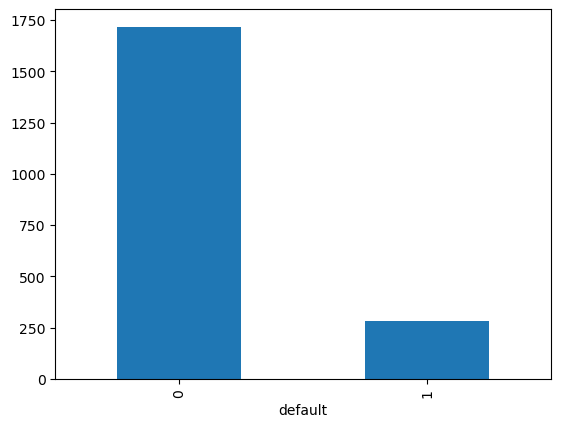

In [29]:
df['default'].value_counts().plot(kind='bar')

In [32]:
## 4. Data visualization , kde pdf

In [33]:
### 4.1 Histograms + KDE for numerical features

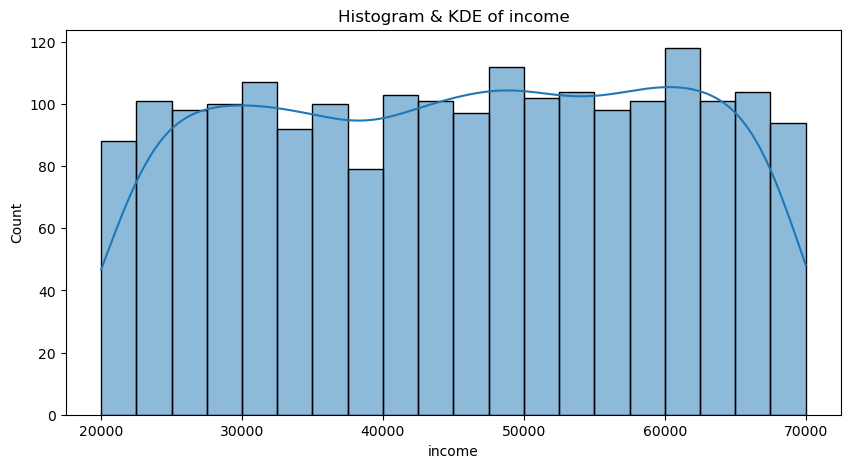

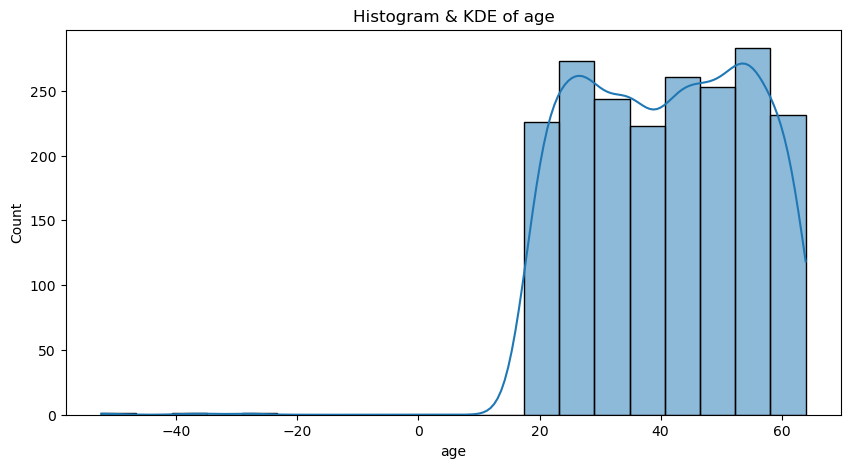

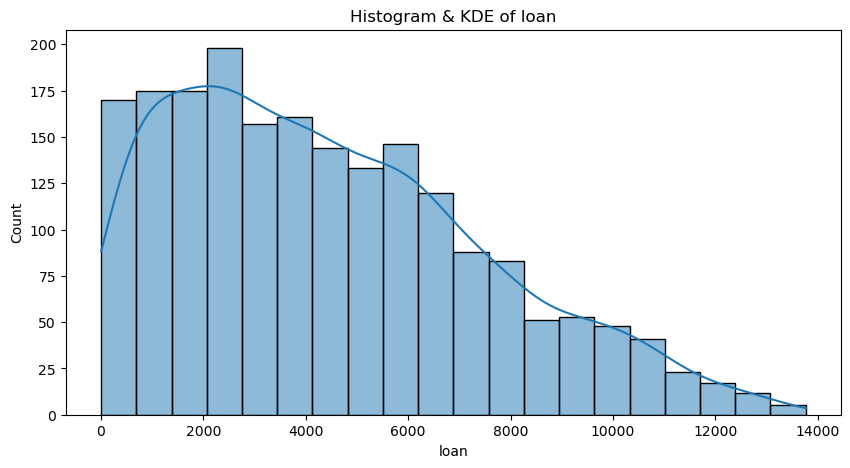

In [35]:
numerical_cols = ['income', 'age', 'loan']

for col in numerical_cols:
    plt.figure(figsize=(10,5))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Histogram & KDE of {col}')
    plt.show()


In [36]:
### 4.2 Count plot for target

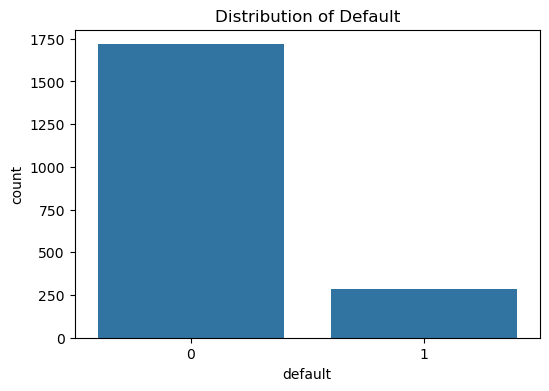

In [37]:
plt.figure(figsize=(6,4))
sns.countplot(x='default', data=df)
plt.title('Distribution of Default')
plt.show()


In [40]:
## 5 Bivariate Analysis

In [41]:
### 5.1 Numerical vs Target

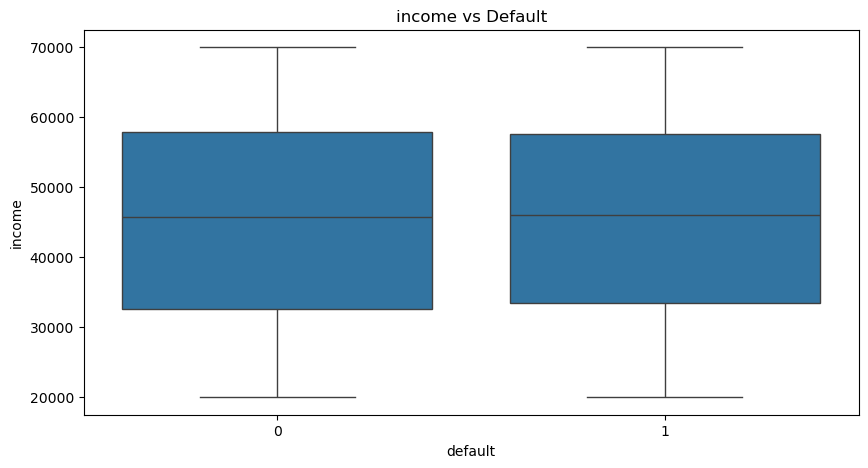

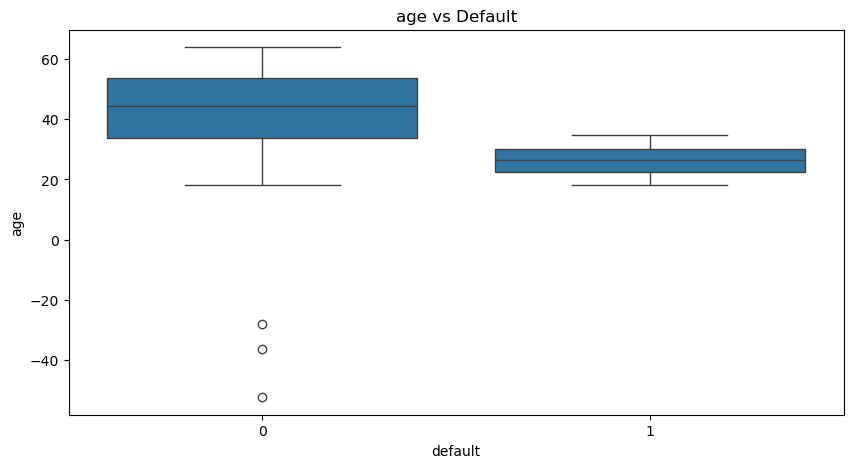

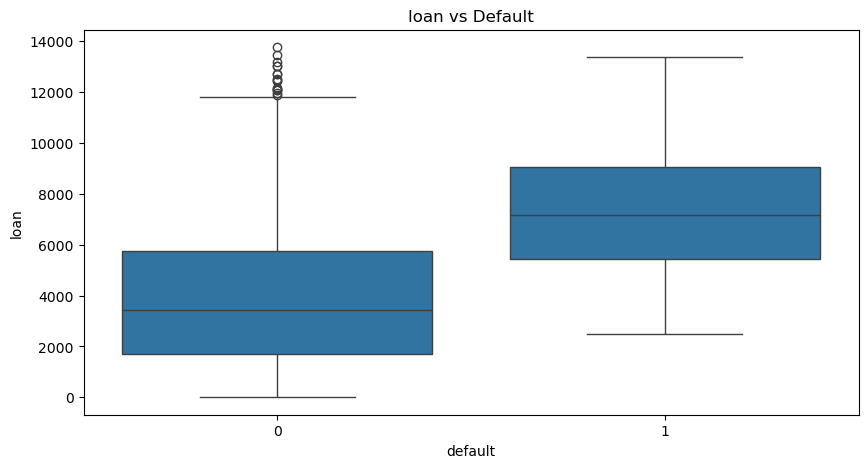

In [42]:
for col in numerical_cols:
    plt.figure(figsize=(10,5))
    sns.boxplot(x='default', y=col, data=df)
    plt.title(f'{col} vs Default')
    plt.show()


In [43]:
### 5.2 Correlation with target

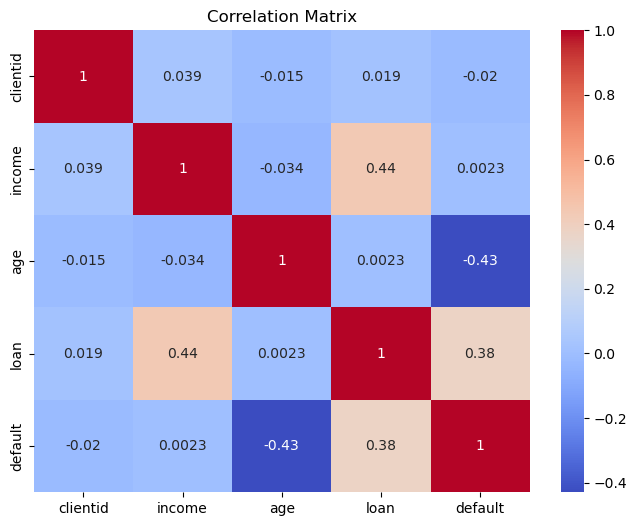

In [44]:
corr = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [45]:
## 6. Multivariate Analysis

In [46]:
### 6.1 Pairplot

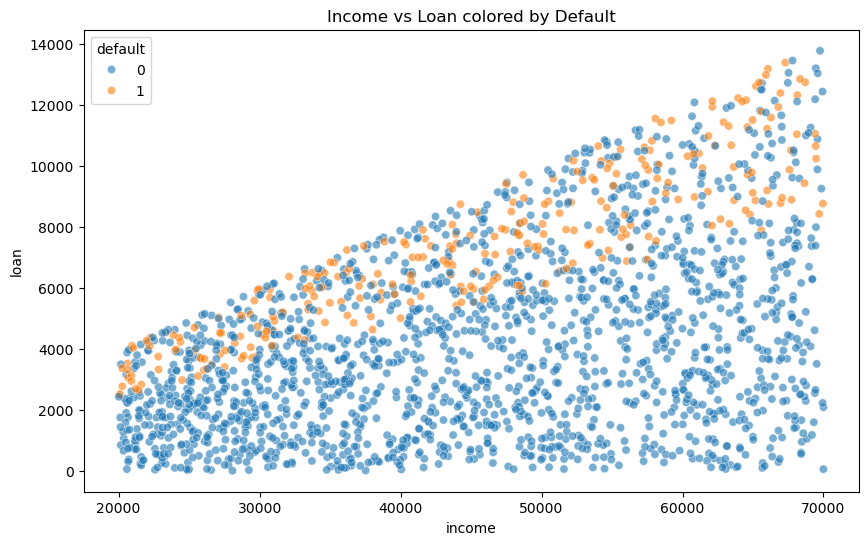

In [47]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='income', y='loan', hue='default', data=df, alpha=0.6)
plt.title('Income vs Loan colored by Default')
plt.show()


In [48]:
### 6.2 Age vs Income vs Default

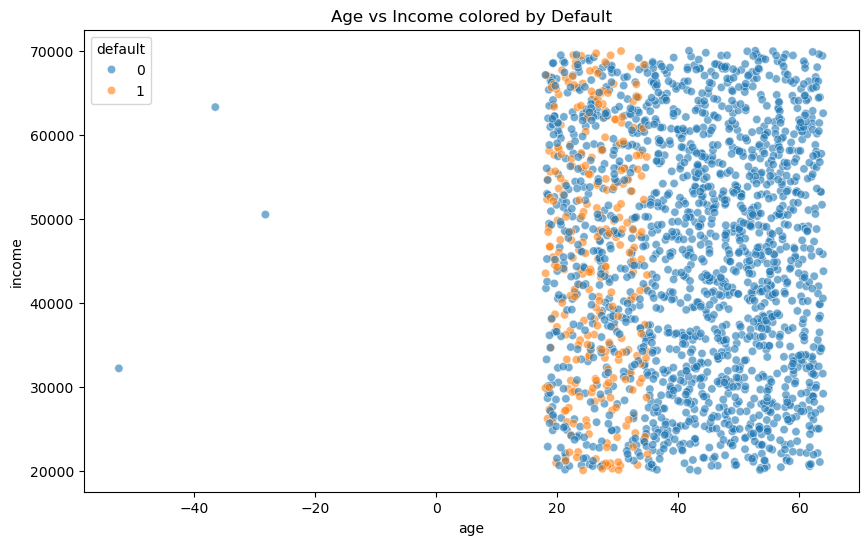

In [49]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='income', hue='default', data=df, alpha=0.6)
plt.title('Age vs Income colored by Default')
plt.show()


In [50]:
### 6. Outlier Detection

In [51]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col} Outliers: {len(outliers)}")


income Outliers: 0
age Outliers: 3
loan Outliers: 5


In [ ]:
## 7. Feature Engineering Suggestions

In [52]:
###  7.1  Debt-to-Income ratio

In [53]:
df['dti'] = df['loan'] / df['income']


In [55]:
df

,clientid,income,age,loan,default,dti
0,1,66155.92510,59.017015,8106.532131,0,0.122537
1,2,34415.15397,48.117153,6564.745018,0,0.190752
2,3,57317.17006,63.108049,8020.953296,0,0.139940
3,4,42709.53420,45.751972,6103.642260,0,0.142911
4,5,66952.68885,18.584336,8770.099235,1,0.130989
...,...,...,...,...,...,...
1995,1996,59221.04487,48.518179,1926.729397,0,0.032535
1996,1997,69516.12757,23.162104,3503.176156,0,0.050394
1997,1998,44311.44926,28.017167,5522.786693,1,0.124636
1998,1999,43756.05660,63.971796,1622.722598,0,0.037086


In [56]:
### 5.2 Age Buckets

In [57]:
df['age_group'] = pd.cut(df['age'], bins=[18,30,45,60,100], labels=['18-30','31-45','46-60','60+'])

In [58]:
### 5.3 Log Transform skewed features

In [59]:
df['income_log'] = np.log1p(df['income'])
df['loan_log'] = np.log1p(df['loan'])


In [60]:
## 8. Target Imbalance Check


Default value counts:
default
0    1717
1     283
Name: count, dtype: int64


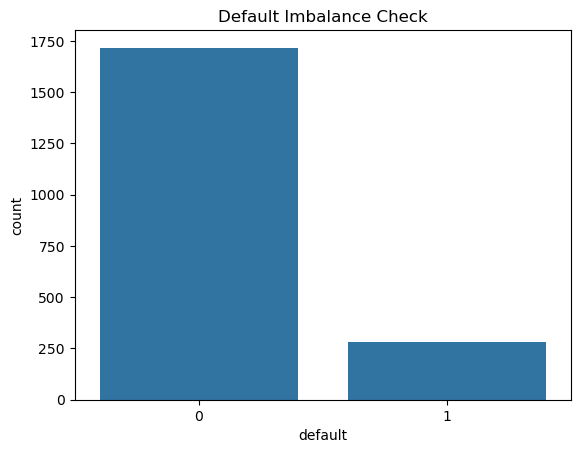

In [61]:
print("\nDefault value counts:")
print(df['default'].value_counts())
sns.countplot(x='default', data=df)
plt.title('Default Imbalance Check')
plt.show()
